# Loading source data

**Objective:**
Build a artifitial neural network for predicting median house value of California housing dataset. The problem is supervised regression problem

**Package version**

*  tensorflow==2.2.0
*  matplotlib==3.2.1
*  h5py==2.10.0
*  google==2.0.3







In [ ]:
import numpy as np       # Library for number operations
import pandas as pd      # Library for data operations
import seaborn as sb     # Library for data visualization
import matplotlib.pyplot as plt  # Library for data visualization
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay



**About California housing dataset**


This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
This dataset was derived from the 1990 U.S. census, using one row per censusblock group. A block group is the smallest geographical unit for which the U.S.


*  Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
*  The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).





In [ ]:
# Fetching California Datset
# skLearn software machine learning library for the Python programming language.

from sklearn.datasets import fetch_california_housing
ann_data = fetch_california_housing()
type(ann_data)  #


sklearn.utils._bunch.Bunch

In [ ]:
ann_data.feature_names # Dataset features or columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

# Exploratory Data Analysis

In [ ]:
df = pd.DataFrame(data=ann_data.data,columns=ann_data.feature_names) # store it  in a datfarme python datastructure
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.isnull().sum()
# no null value present

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
ann_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
ann_data.target # The column that needs to be predicted (Y)

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
df.shape # 20640 rows, 8 cols

(20640, 8)

In [ ]:
df.describe() #returns description of the data in the DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
df.info() #no categorical value all float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


<Axes: xlabel='Longitude', ylabel='Latitude'>

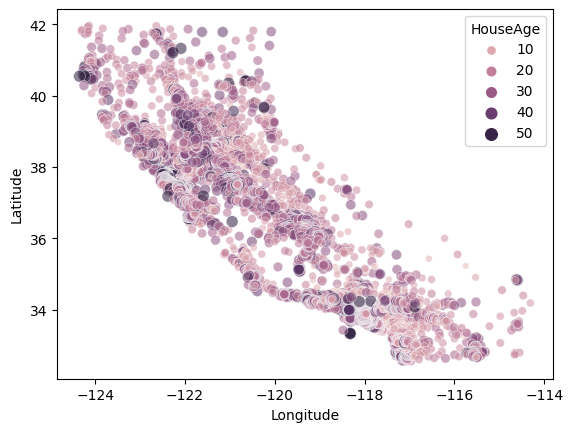

In [ ]:
import seaborn as sns
sns.scatterplot(
    data=df, # input data frame
    x="Longitude", # axis
    y="Latitude", # axis
    size="HouseAge", # Grouping variable that will produce points with different sizes
    hue="HouseAge", # Grouping variable that will produce points with different colors.
    alpha=0.55, # Transparency

)

# `Train & Test Split`

In [ ]:
from sklearn.model_selection import train_test_split  #  Quikc Utility Split arrays or matrices into random train and test subsets.

X, y = ann_data.data, ann_data.target


In [ ]:
y.shape

(20640,)

In [ ]:
# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)


(16512, 8) (16512,)
(4128, 8) (4128,)


In [ ]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

X_train = StandardScaler().fit_transform(X_train)   # Scale train data
X_test = StandardScaler().fit_transform(X_test)    # Scale test data


# Model Building

TensorFlow is an open-source deep learning library that is developed and maintained by Google. It offers dataflow programming which performs a range of machine learning tasks. It was built to run on multiple CPUs or GPUs and even mobile operating systems, and it has several wrappers in several languages like Python, C++, or Java.

KERAS is an Open Source Neural Network library written in Python that runs on top of Theano or Tensorflow. It is designed to be modular, fast and easy to use. It was developed by François Chollet, a Google engineer. It is a useful library to construct any deep learning algorithm
It is an end-to-end platform that is built to be powerful and operate at a high-performance level


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential() # Create the sequential keras model

#first layer with 8 neurons, mentioning the input layer as well
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))

#adding layers to the DL model

#First hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

#Second hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

#Second hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

#output layer with 1 neuron for regression predicted value
model.add(Dense(1))


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 977 (3.82 KB)
Trainable params: 977 (3.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


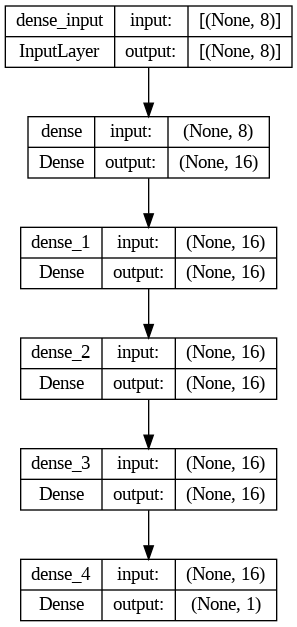

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Traing Regression Model

In [ ]:
# Configure the model

model.compile(
optimizer='adam',
loss='mean_absolute_error',
metrics=['mean_squared_error']
)

# Start model training phase

history = model.fit(
X_train,
y_train,
batch_size=128,
validation_split=0.1,
epochs=500,
verbose=1,
)
Score,mse_test = model.evaluate(X_test, y_test,batch_size=100)
print ('Train score',Score)
print ('MSE Error',mse_test)


Epoch 1/500
117/117 [==============================] - 2s 4ms/step - loss: 1.2445 - mean_squared_error: 2.8015 - val_loss: 0.6930 - val_mean_squared_error: 0.9442
Epoch 2/500
117/117 [==============================] - 0s 4ms/step - loss: 0.6034 - mean_squared_error: 0.8639 - val_loss: 0.5871 - val_mean_squared_error: 0.6950
Epoch 3/500
117/117 [==============================] - 0s 4ms/step - loss: 0.5215 - mean_squared_error: 0.5723 - val_loss: 0.5185 - val_mean_squared_error: 0.5654
Epoch 4/500
117/117 [==============================] - 0s 4ms/step - loss: 0.4724 - mean_squared_error: 0.4806 - val_loss: 0.4918 - val_mean_squared_error: 0.5065
Epoch 5/500
117/117 [==============================] - 1s 4ms/step - loss: 0.4552 - mean_squared_error: 0.4442 - val_loss: 0.4759 - val_mean_squared_error: 0.4823
Epoch 6/500
117/117 [==============================] - 1s 4ms/step - loss: 0.4449 - mean_squared_error: 0.4252 - val_loss: 0.4716 - val_mean_squared_error: 0.4794
Epoch 7/500
117/117 [=

# Testing the model

In [ ]:
history.history.keys()


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

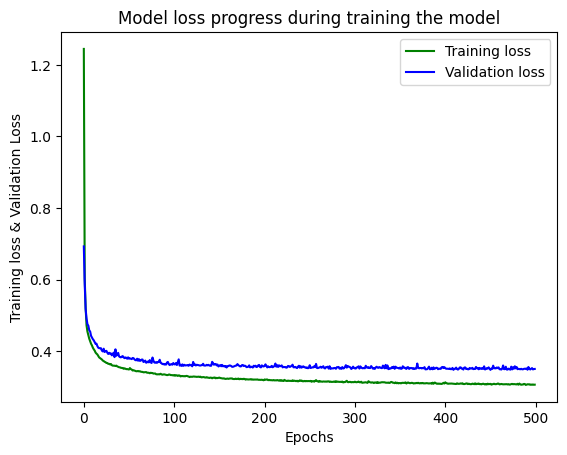

In [ ]:
plt.plot(history.history['loss'], color='g', label='Training loss')
plt.plot(history.history['val_loss'], color='b', label='Validation loss')
plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss & Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)
y_pred=model.predict(X_test)
y_pred


129/129 [==============================] - 1s 3ms/step


array([[0.42243797],
       [1.4024026 ],
       [0.9504305 ],
       ...,
       [0.9511259 ],
       [3.2780857 ],
       [1.1683042 ]], dtype=float32)

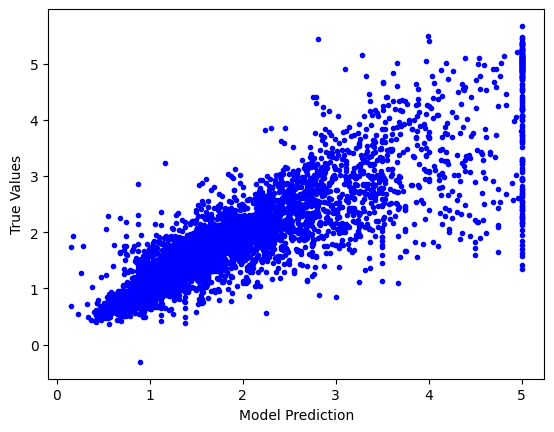

In [ ]:
plt.plot(y_test, y_pred, '.', color = 'b')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
n = len(X_test)
k = X_test.shape[1]
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE =', RMSE, '\nMSE=', MSE, '\nMAE=', MAE,'\nAdjusted R2=', adj_r2)
print('Varscore:', metrics.explained_variance_score(y_test,y_pred))


RMSE = 0.6044556435909171 
MSE= 0.3653666250689097 
MAE= 0.3854620202028289 
Adjusted R2= 0.7184635751284362
Varscore: 0.7264483504572458


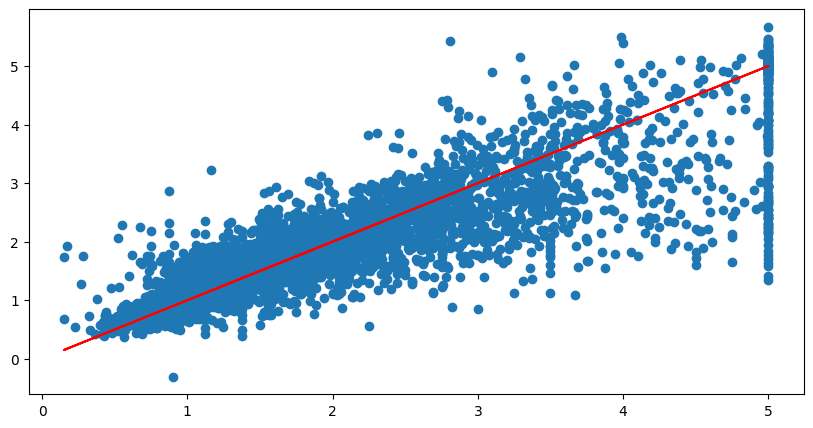

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)

plt.plot(y_test,y_test,'r')